Давыдов ПИм-231 лаба 13

Классификация: кодирование категориальных признаков (например, One Hot Encoding), скалирование признаков (нормализация и стандартизация), подбор гиперпараметров моделей (GridSearchCV).

Задание:

(1) загрузите данные о доходах населения.

(2) уберите строки с неизвестными значениями.

(3) постройте тепловую матрицу корреляции. Если обнаружатся полностью зависимые признаки - оставьте только один из двух.

(4) рассмотрев данные, определите порядковые категориальные признаки (если они есть на Ваш взгляд) и вручную перекодируйте их в числовые. Остальные категориальные признаки закодируйте методом One Hot Encoding или pd.get_dummies.

(5) разбейте выборку на обучающую и тестовую, обучите модель логистической регрессии, оцените качество с помощью classification_report.

(6) выполните нормализацию (normalizer) признаков и повторите пункт 5.

(7) выполните стандартизацию (standartscaller) признаков и повторите пункт 5.

(8) выполните масштабирование minmaxscaller и повторите пункт 5.

(9) Сравнив 5, 6, 7, 8 ответьте на вопрос: как меняется качество модели?

(10) Постройте гистограммы распределения для какого-нибудь столбца (например, fnlwgt) без масштабирования и с различными рассмотренными способами масштабирования.

(11) Подберите с помощью GridSearchCV оптимальное значение гиперпараметра С (L2-регуляризация) модели логистической регрессии.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

(1) загрузите данные о доходах населения.

In [ ]:
data = pd.read_csv('adult.csv')
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


(2) уберите строки с неизвестными значениями.

In [ ]:
data = data.replace('?', np.nan)
data = data.dropna()
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


(3) постройте тепловую матрицу корреляции. Если обнаружатся полностью зависимые признаки - оставьте только один из двух.

<ipython-input-13-ad06d5a6ccf6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


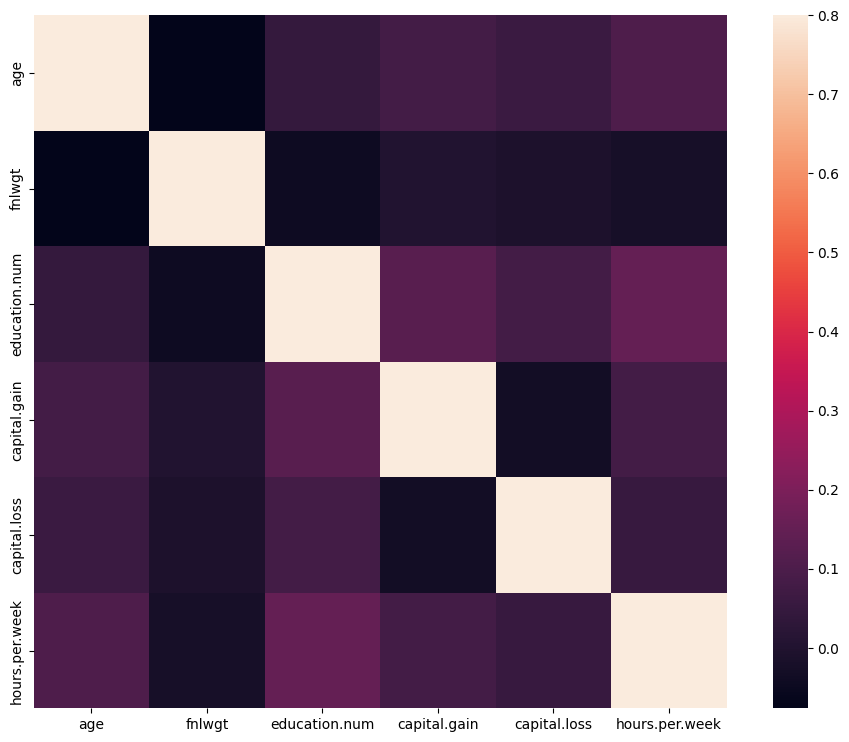

In [ ]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax = .8, square = True, ax = ax)
plt.show()

In [ ]:
data['education'].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [ ]:
data['education.num'].value_counts()

9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: education.num, dtype: int64

In [ ]:
del data['education']

In [ ]:
data

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


(4) рассмотрев данные, определите порядковые категориальные признаки (если они есть на Ваш взгляд) и вручную перекодируйте их в числовые. Остальные категориальные признаки закодируйте методом One Hot Encoding или pd.get_dummies.

In [ ]:
y = data['income'].replace({'<=50K': 0, '>50K': 1})
y

1        0
3        0
4        0
5        0
6        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 30162, dtype: int64

In [ ]:
X = data.drop('income', axis=1)
X

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [ ]:
X = pd.get_dummies(X)
X

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,3770,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32559,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


(5) разбейте выборку на обучающую и тестовую, обучите модель логистической регрессии, оцените качество с помощью classification_report.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6754
           1       0.72      0.26      0.38      2295

    accuracy                           0.79      9049
   macro avg       0.75      0.61      0.62      9049
weighted avg       0.77      0.79      0.75      9049



In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[6521  233]
 [1706  589]]


(6) выполните нормализацию (normalizer) признаков и повторите пункт 5.

(7) выполните стандартизацию (standartscaller) признаков и повторите пункт 5.

(8) выполните масштабирование minmaxscaller и повторите пункт 5.

In [ ]:
# Нормализация
scaler = Normalizer()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Стандартизация
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# minmaxscaler
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

# Функция создающая модель, но на разных иксах, грубо говоря
def evaluate_model(X_train, X_test, y_train, y_test):
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    return report

# Без вмешательств
report_no_scaling = evaluate_model(X_train, X_test, y_train, y_test)

# Нормализация
report_normalized = evaluate_model(X_train_normalized, X_test_normalized, y_train, y_test)

# Стандартизация
report_standardized = evaluate_model(X_train_standardized, X_test_standardized, y_train, y_test)

# Минмакс
report_minmax = evaluate_model(X_train_minmax, X_test_minmax, y_train, y_test)

print("Обыные иксы:\n", report_no_scaling)
print("\nНормализация:\n", report_normalized)
print("\nСтандартизация:\n", report_standardized)
print("\nМинмакс:\n", report_minmax)

Обыные иксы:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      6754
           1       0.72      0.26      0.38      2295

    accuracy                           0.79      9049
   macro avg       0.75      0.61      0.62      9049
weighted avg       0.77      0.79      0.75      9049


Нормализация:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      6754
           1       0.92      0.09      0.16      2295

    accuracy                           0.77      9049
   macro avg       0.84      0.54      0.51      9049
weighted avg       0.80      0.77      0.69      9049


Стандартизация:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      6754
           1       0.73      0.61      0.66      2295

    accuracy                           0.84      9049
   macro avg       0.80      0.77      0.78      9049
weighted avg       0.84   

(9) Сравнив 5, 6, 7, 8 ответьте на вопрос: как меняется качество модели?

С нормализацией - модель точнее определяет единички.

Стандартизация улучшила в принципе частоту правильно предсказанных случаев.

Минмакс улучшил количество предсказанных 0.

(10) Постройте гистограммы распределения для какого-нибудь столбца (например, fnlwgt) без масштабирования и с различными рассмотренными способами масштабирования.

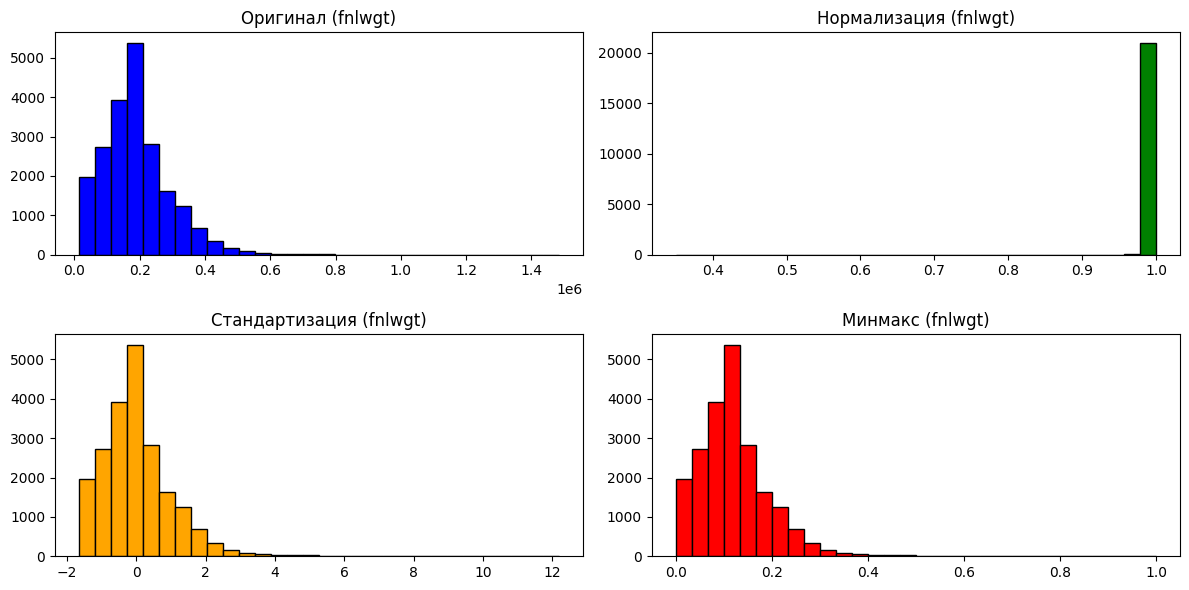

In [ ]:
# без масштабирования
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(X_train['fnlwgt'], bins=30, color='blue', edgecolor='black')
plt.title('Оригинал (fnlwgt)')

# построение гистограмм для столбца 'fnlwgt' с различными методами масштабирования
plt.subplot(2, 2, 2)
plt.hist(X_train_normalized[:, X_train.columns.get_loc('fnlwgt')], bins=30, color='green', edgecolor='black')
plt.title('Нормализация (fnlwgt)')

plt.subplot(2, 2, 3)
plt.hist(X_train_standardized[:, X_train.columns.get_loc('fnlwgt')], bins=30, color='orange', edgecolor='black')
plt.title('Стандартизация (fnlwgt)')

plt.subplot(2, 2, 4)
plt.hist(X_train_minmax[:, X_train.columns.get_loc('fnlwgt')], bins=30, color='red', edgecolor='black')
plt.title('Минмакс (fnlwgt)')

plt.tight_layout()
plt.show()

(11) Подберите с помощью GridSearchCV оптимальное значение гиперпараметра С (L2-регуляризация) модели логистической регрессии.

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_standardized, y_train)

# Вывод оптимального значения гиперпараметра
print(f"Оптимальное значение C: {grid_search.best_params_['C']}")

Оптимальное значение C: 1


Попробуем использовать C = 1 + стандартизацию

In [ ]:
model = LogisticRegression(random_state=42, C=1)
model.fit(X_train_standardized, y_train)
y_pred = model.predict(X_test_standardized)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6754
           1       0.73      0.61      0.66      2295

    accuracy                           0.84      9049
   macro avg       0.80      0.77      0.78      9049
weighted avg       0.84      0.84      0.84      9049



Ничего не поменялось, зато нашли оптимальный C =)